## FIT5196 - Assignment 2 - Data Cleansing

Student ID - 29470811
<br>
Name - Prashantkumar Kulkarni

Introduction

In this assignment we are dealing with various Anomalies and clean the data to get error free output.
<br>
Following are the anomalies we are dealing with:
1. **Syntactic Anomalies**: 
describe characteristics concerning the format and values used for representation of the entities. Syntactic anomalies such as: lexical errors, domain format errors, syntactical error and irregularities.
2. **Semantic Anomalies**: 
hinder the data collection from being a comprehensive and non-redundant representation of the mini-world. These types of anomalies include: Integrity constraint violations, contradictions, duplicates and invalid tuples
3. **Coverage Anomalies**: 
decrease the amount of entities and entity properties from the mini-world that are represented in the data collection. Coverage anomalies are categorized as: missing values and missing tuples

In [1]:
import pandas as pd
import numpy as np
import re
import math
from math import cos, sin,asin, atan2, sqrt

In [2]:
df_1 = pd.read_csv('29470811.csv')

In [3]:
df_1.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1452483576,2.0,0.0,26.600,31.0,44.0,-37.877522,148.376599,-37.967863,142.972314,474.598,2018-03-25,19:30:43,445.17,2:55:53,168.01
1,ID5301915065,1.0,1.0,40.675,1.0,17.0,-37.136918,143.708653,-37.370240,146.218493,223.888,2018-04-23,03:23:43,230.97,7:14:41,176.84
2,ID1770962648,1.0,0.0,28.397,26.0,18.0,-38.546881,147.155501,-38.670277,144.190624,258.258,2018-02-16,04:56:17,265.34,9:21:37,141.39
3,ID5188659169,2.0,1.0,18.548,34.0,35.0,-38.970584,146.702559,-36.635389,147.866366,279.368,2018-02-03,03:07:14,264.95,7:32:10,211.95
4,ID5751585569,1.0,1.0,19.923,44.0,21.0,-37.796631,142.774401,-37.155002,145.040716,212.563,2018-02-25,19:23:37,219.65,23:03:16,156.55


In [4]:
df_1.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,38814.000000,38804.000000,38824.000000,38814.000000,38814.000000,38824.000000,38824.000000,38824.000000,38824.000000,38824.000000,38784.000000,38794.000000
mean,1.696579,0.298397,23.225553,22.900603,23.082857,-37.775494,145.477771,-37.780314,145.487516,218.163278,213.405606,157.808215
std,0.781053,0.457561,10.688470,12.958062,12.964530,1.872401,6.828492,1.882318,6.842351,114.518304,109.315620,62.598874
min,1.000000,0.000000,5.000000,1.000000,1.000000,-39.006998,-148.283772,-39.006998,-148.427287,0.755000,7.590000,73.400000
25%,1.000000,0.000000,14.017750,12.000000,12.000000,-38.494766,144.157372,-38.511489,144.161797,128.980500,128.660000,126.242500
50%,1.000000,0.000000,23.070500,23.000000,23.000000,-37.808067,145.625485,-37.810797,145.662630,205.742000,200.905000,151.110000
75%,2.000000,1.000000,32.300000,34.000000,34.000000,-37.168270,147.199292,-37.169189,147.205055,296.291500,286.920000,178.947500
max,3.000000,1.000000,50.993000,45.000000,45.000000,38.910784,148.450567,38.977841,148.450567,545.017000,543.930000,1234.480000


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38824 entries, 0 to 38823
Data columns (total 16 columns):
Id                       38802 non-null object
Drone Type               38814 non-null float64
Post Type                38804 non-null float64
Package Weight           38824 non-null float64
Origin Region            38814 non-null float64
Destination Region       38814 non-null float64
Origin Latitude          38824 non-null float64
Origin Longitude         38824 non-null float64
Destination Latitude     38824 non-null float64
Destination Longitude    38824 non-null float64
Journey Distance         38824 non-null float64
Departure Date           38824 non-null object
Departure Time           38824 non-null object
Travel Time              38784 non-null float64
Delivery Time            38824 non-null object
Delivery Fare            38794 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.7+ MB


There are total of 16 columns and 38824 entries

The above information shows that there are few null values in various columns and there are null values in ID column as well

In [6]:
df_1.describe(include=['O'])

,Id,Departure Date,Departure Time,Delivery Time
count,38802,38824,38824,38824
unique,38764,266,31197,31126
top,ID5393773114,2018-07-19,00:57:04,16:00:17
freq,3,234,7,5


The ID is the unique identifier and it cannot be same, but we can see that the ID's are repeating and thus the duplicates have to be removed.

#### Removing duplicates and Null Values:
Duplicate records need to removed since they share exactly the same information
<br>
Also the rows with Null values in ID should be removed since the ID's cannot be imputed by any means.

In [7]:
df_2 = df_1.copy()

Before removing ID's with null values, we will analyse them if we can extract any information from them.

In [8]:
df_2[df_2.duplicated(['Package Weight','Delivery Time'],keep=False)].sort_values(['Package Weight','Delivery Time'])

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
15230,ID1194924321,1.0,0.0,5.381,30.0,7.0,-37.771056,143.628749,-36.873294,146.249278,252.577,2018-07-06,21:49:04,259.66,2:08:43,133.41
38792,NaN,1.0,0.0,5.381,30.0,7.0,-37.771056,143.628749,-36.873294,146.249278,252.577,2018-07-06,21:49:04,259.66,2:08:43,133.41
21354,ID1363092045,2.0,0.0,5.741,41.0,28.0,-37.222137,145.549794,-37.095243,147.741699,194.965,2018-06-17,14:58:39,187.04,18:05:41,144.85
38769,ID1363092045,2.0,0.0,5.741,41.0,28.0,-37.222137,145.549794,-37.095243,147.741699,194.965,2018-06-17,14:58:39,187.04,18:05:41,144.85
30714,ID1368789479,3.0,0.0,5.918,31.0,33.0,-38.032714,148.332703,-37.567752,147.421843,95.381,2018-05-18,05:43:50,87.50,7:11:20,196.64
38775,ID1368789479,3.0,0.0,5.918,31.0,33.0,-38.032714,148.332703,-37.567752,147.421843,95.381,2018-05-18,05:43:50,87.50,7:11:20,196.64
34176,ID1778901150,2.0,0.0,6.081,41.0,16.0,-37.205833,145.599230,-36.883716,144.859332,74.882,2018-01-10,00:04:44,76.20,1:20:56,154.41
38815,ID1778901150,2.0,0.0,6.081,41.0,16.0,-37.205833,145.599230,-36.883716,144.859332,74.882,2018-01-10,00:04:44,76.20,1:20:56,154.41
30660,ID5394953439,2.0,1.0,6.576,23.0,6.0,-38.975414,148.229235,-38.946917,143.517789,407.776,2018-06-18,16:23:55,383.49,22:47:24,203.86
38801,ID5394953439,2.0,1.0,6.576,23.0,6.0,-38.975414,148.229235,-38.946917,143.517789,407.776,2018-06-18,16:23:55,383.49,22:47:24,203.86


When we look at the null values, they exactly match the row with the one of the ID's and thus they can be removed from the dataframe

In [9]:
df_2=df_2.dropna(subset =['Id'])

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38802 entries, 0 to 38822
Data columns (total 16 columns):
Id                       38802 non-null object
Drone Type               38792 non-null float64
Post Type                38782 non-null float64
Package Weight           38802 non-null float64
Origin Region            38792 non-null float64
Destination Region       38792 non-null float64
Origin Latitude          38802 non-null float64
Origin Longitude         38802 non-null float64
Destination Latitude     38802 non-null float64
Destination Longitude    38802 non-null float64
Journey Distance         38802 non-null float64
Departure Date           38802 non-null object
Departure Time           38802 non-null object
Travel Time              38762 non-null float64
Delivery Time            38802 non-null object
Delivery Fare            38772 non-null float64
dtypes: float64(12), object(4)
memory usage: 5.0+ MB


In [11]:
df_2.describe(include=['O'])

,Id,Departure Date,Departure Time,Delivery Time
count,38802,38802,38802,38802
unique,38764,266,31197,31126
top,ID5393773114,2018-07-19,00:57:04,17:19:49
freq,3,234,7,5


But we still have the ID's with duplicates, we will remove the duplicate id's in the next step

In [12]:
df_2.drop_duplicates('Id',keep='first',inplace=True)

In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38764 entries, 0 to 38763
Data columns (total 16 columns):
Id                       38764 non-null object
Drone Type               38754 non-null float64
Post Type                38744 non-null float64
Package Weight           38764 non-null float64
Origin Region            38754 non-null float64
Destination Region       38754 non-null float64
Origin Latitude          38764 non-null float64
Origin Longitude         38764 non-null float64
Destination Latitude     38764 non-null float64
Destination Longitude    38764 non-null float64
Journey Distance         38764 non-null float64
Departure Date           38764 non-null object
Departure Time           38764 non-null object
Travel Time              38724 non-null float64
Delivery Time            38764 non-null object
Delivery Fare            38734 non-null float64
dtypes: float64(12), object(4)
memory usage: 5.0+ MB


The dataframe now has the unique rows with no duplicates

#### Identifying the outliers for Origin, Destination Latitudes and Longitudes

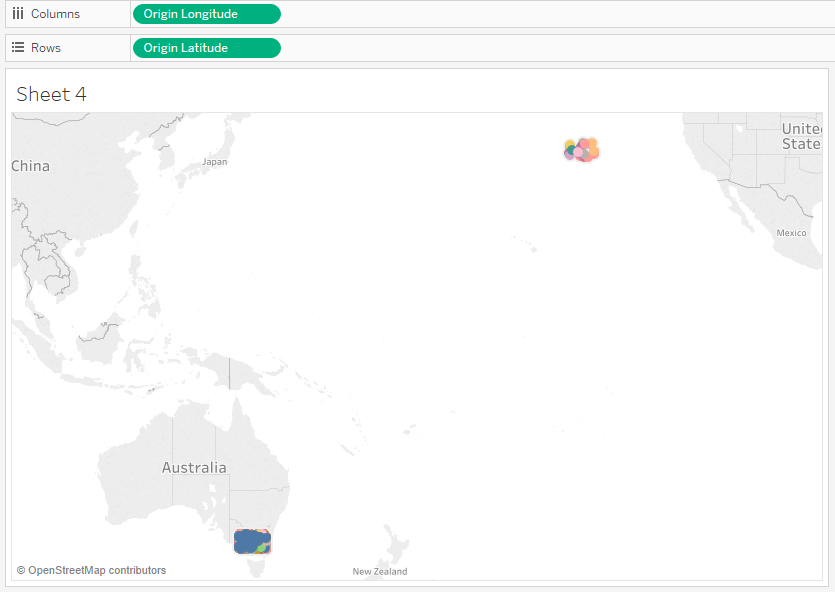

In [14]:
from IPython.display import Image, display
display(Image(filename='wrangling1.png', embed=True))

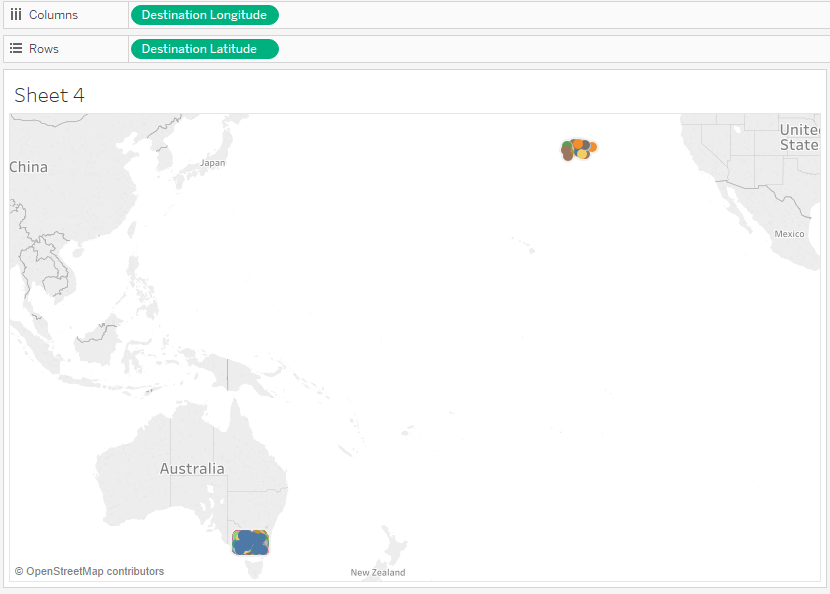

In [15]:
from IPython.display import Image, display
display(Image(filename='wrangling2.png', embed=True))

The pictures above show that few of the Latitudes and Longitudes for both origin and destination lie outside the range and these points are far away from victoria and hence need to be fixed.

#### There are some unusual points which are positive values for latitude and negative values for Longitudes and hence are the ones to be fixed

In [16]:
df_3 = df_2.copy()
for each in df_3['Origin Latitude']:
    if(each > 0):
        each_n = each * (-1)
        df_3 = df_3.replace(each, each_n)
        
for each in df_3['Destination Latitude']:
    if(each > 0):
        each_n = each * (-1)
        df_3 = df_3.replace(each, each_n)
        
for each in df_3['Destination Longitude']:
    if(each < 0):
        each_n = each * (-1)
        df_3 = df_3.replace(each, each_n)
        
for each in df_3['Origin Longitude']:
    if(each < 0):
        each_n = each * (-1)
        df_3 = df_3.replace(each, each_n)

#### The values are corrected and will verify if the error is fixed

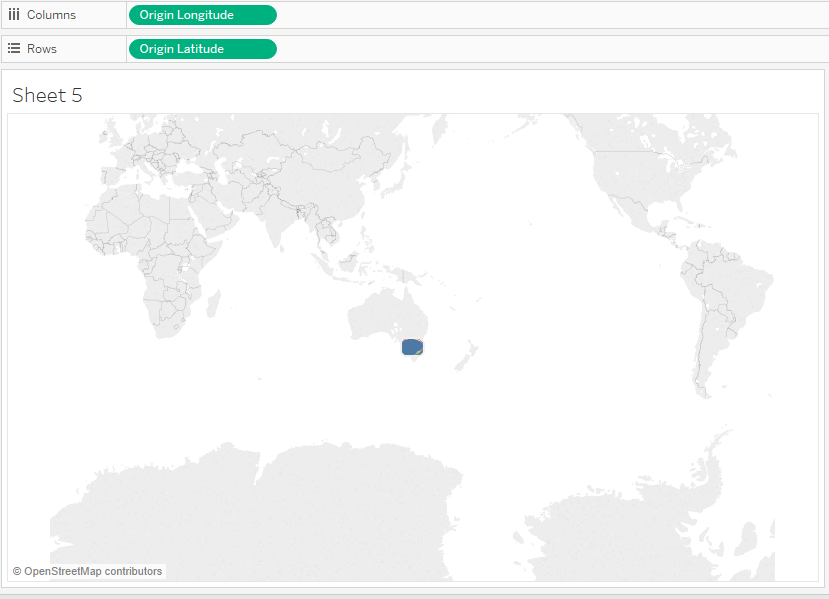

In [17]:
display(Image(filename='wrangling3.png', embed=True))

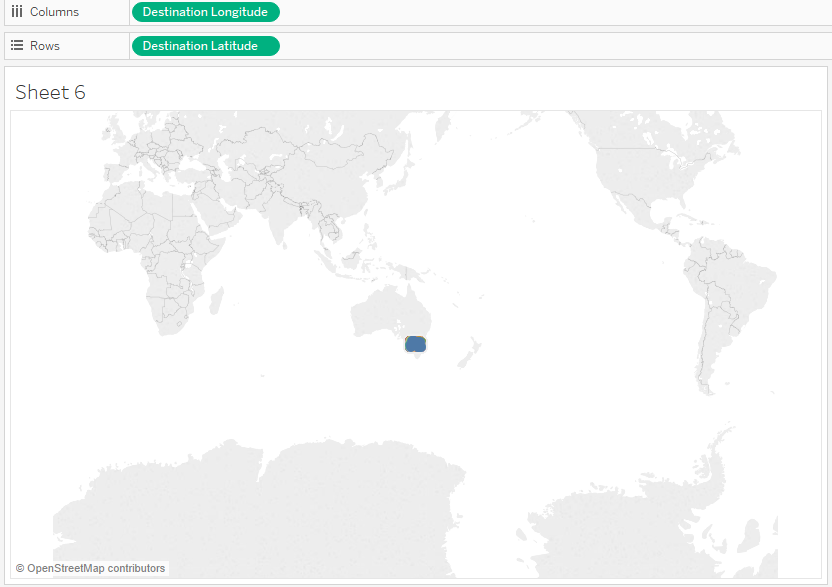

In [18]:
display(Image(filename='wrangling4.png', embed=True))

The latitudes and the longitudes for both origin and destination are now fixed.

### Journey Distance
#### The Journey distance column has some errors and it can be fixed with the help of the corrected Latitudes and Longitudes in the previous step

Defining a function to calculate distance using latitudes, longitudes

In [19]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295     
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12756 * asin(sqrt(a))

To find the distances which have error

In [20]:
df_4 = df_3.copy()
for index,row in df_4.iterrows():
        distance_r = round(distance(row['Origin Latitude'],row['Origin Longitude'],row['Destination Latitude'],row['Destination Longitude']),3)
        if(round(row['Journey Distance'],3) != distance_r):
            print(round(row['Journey Distance'],3))

221.223
239.84
82.872
203.996
352.501
411.235
316.495
263.762
383.647
174.728
397.36
311.703
160.653
229.649
250.404


We have 15 such records whose distance must be fixed.

In [21]:
for index,row in df_4.iterrows():
        distance_r = round(distance(row['Origin Latitude'],row['Origin Longitude'],row['Destination Latitude'],row['Destination Longitude']),3)
        if(round(row['Journey Distance'],3) != distance_r):
            df_4['Journey Distance'][df_4['Id']==row['Id']]=distance_r

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


We will verify if the journey distance is fixed properly

In [22]:
for index,row in df_4.iterrows():
        distance_r = round(distance(row['Origin Latitude'],row['Origin Longitude'],row['Destination Latitude'],row['Destination Longitude']),3)
        if(round(row['Journey Distance'],3) != distance_r):
            print(round(row['Journey Distance'],3))

No values are displayed, the journey distance is fixed now

### Origin Region, Destination Region

Finding the null values for origin and destination regions

In [23]:
df_4['Origin Region'].isnull().sum()

10

In [24]:
df_4['Destination Region'].isnull().sum()

10

There are 10 missing values each in both Origin and destination regions.

We will find if there is any mismatch in the regions

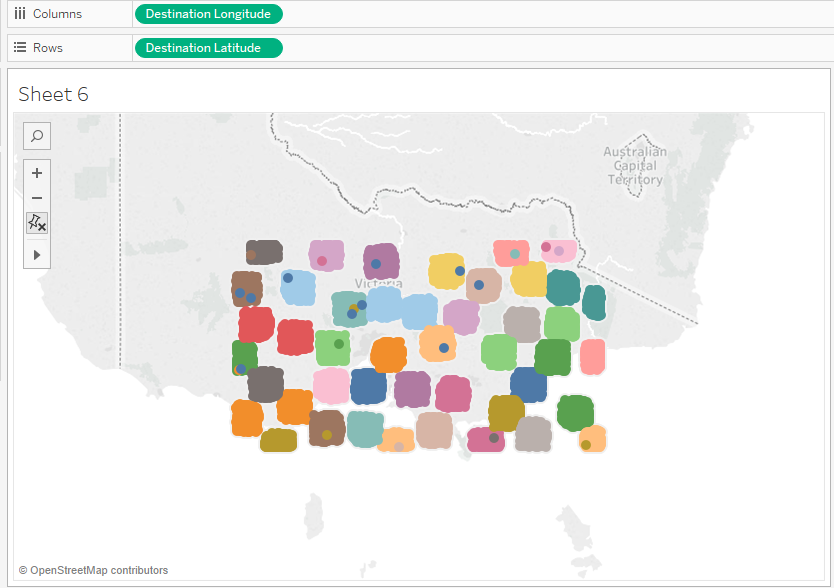

In [25]:
display(Image(filename='wrangling5.png', embed=True))

Each region is coloured differently and the points are represented by lattitude longitudes.
We can observe few points lie in the other regions, and hence those points have to be fixed 

Similarly for origin region

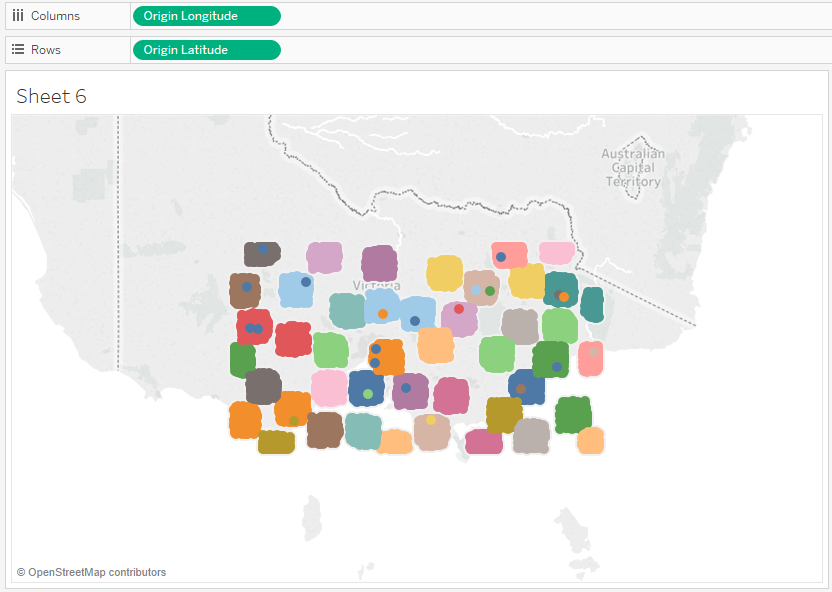

In [26]:
display(Image(filename='wrangling6.png', embed=True))

#### Approach
First will calculate the center of each region
<br>
Next step will calculate the radius excluding the outliers for each region
<br>
Finally assign the points to the respective regions

#### Function to calculate the center of a region given lattitudes and longitudes

In [27]:
def center_geolocation(geolocations):
    x = 0
    y = 0
    z = 0
    for lat, lon in geolocations:
        lat = float(lat)
        lon = float(lon)
        x += cos(lat) * cos(lon)
        y += cos(lat) * sin(lon)
        z += sin(lat)

    x = float(x / len(geolocations))
    y = float(y / len(geolocations))
    z = float(z / len(geolocations))

    return (atan2(z, sqrt(x * x + y * y)),atan2(y, x))

We will make a list of unique origin regions

In [28]:
origin_region = []
for each in df_4['Origin Region'].unique():
    if(each > 0):
        origin_region.append(each)

#### Finding centers of each region by grouping them and excluding the outliers by using 3 standard deviation.

In [29]:
dictionary = {}
center_pts = {}
for each in origin_region:
    df_5 = df_4[df_4['Origin Region']==each]
    df_5 = df_5[np.abs(df_5['Origin Latitude']-df_5['Origin Latitude'].mean()) <= (3*df_5['Origin Latitude'].std())]
    df_5 = df_5[np.abs(df_5['Origin Longitude']-df_5['Origin Longitude'].mean()) <= (3*df_5['Origin Longitude'].std())]
    
    sum = []
    for index,row in df_5.iterrows():
        x1 = row['Origin Latitude']
        y1 = x1 * math.pi / 180
        x2 = row['Origin Longitude']
        y2 = x2 * math.pi / 180
        
        sum.append((y1,y2))
    center = center_geolocation(sum)
    
    center_latitude = center[0] * 180/math.pi
    center_longitude = center[1]*180/math.pi
    center_pts[each] = (center_latitude,center_longitude)
    radius = []
    for index,row in df_5.iterrows():
        radius_r = round(distance(center_latitude,center_longitude,row['Origin Latitude'],row['Origin Longitude']),3)
        radius.append(radius_r)
    dictionary[each]= max(radius)

    

Will reassign the points having incorrect regions to their respective regions

In [30]:
df_5 = df_4.copy()
for index,row in df_5.iterrows():
    if not (row['Origin Region'] > 0):
        radius_list = []
        for key,value in center_pts.items():
            center = center_pts[key]
            center_latitude = center[0]
            center_longitude = center[1]
            radius_r = round(distance(center_latitude,center_longitude,row['Origin Latitude'],row['Origin Longitude']),3)
            if(radius_r <= dictionary[key]):
                radius_list.append(radius_r)
                df_5['Origin Region'][df_5['Id']==row['Id']]=key

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Now the null values are fixed, in the next step will fix the origin regions which have been assigned incorrectly

Will collect the ID's whose regions are incorrectly been assigned

In [31]:
id_list = []
df_7 = df_4.copy()
for each in sorted(origin_region):
    df_6 = df_7[df_7['Origin Region']==each]
    for index,row in df_6.iterrows():
        if(np.abs(row['Origin Latitude']-df_6['Origin Latitude'].mean()) > (3*df_6['Origin Latitude'].std())):
            id_list.append(row['Id'])
        elif(np.abs(row['Origin Longitude']-df_6['Origin Longitude'].mean()) > (3*df_6['Origin Longitude'].std())):
            id_list.append(row['Id'])

Will fix the incorrect origin regions and assign back them to the original region

In [32]:
df_7 = df_5.copy()
n = 0
for each in id_list:
    for index,row in df_7.iterrows():
        if(row['Id']==each):
            for key,value in center_pts.items():
                center = center_pts[key]
                center_latitude = center[0]
                center_longitude = center[1]
                radius_r = round(distance(center_latitude,center_longitude,row['Origin Latitude'],row['Origin Longitude']),3)
                n = n +1
                if(radius_r <= dictionary[key]):
                    n = n +1
                    radius_list.append(radius_r)
                    df_7['Origin Region'][df_7['Id']==row['Id']]=key

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Will verify if the origin regions are fixed

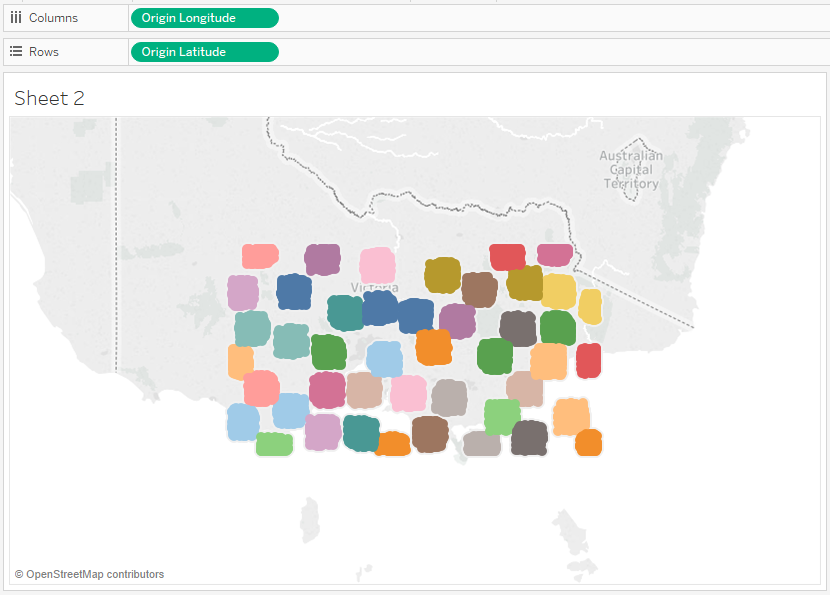

In [33]:
display(Image(filename='wrangling8.png', embed=True))

In the similar way the Origin Region was fixed, we shall fix destination region

In [34]:
destination_region = []
for each in df_4['Destination Region'].unique():
    if(each > 0):
        destination_region.append(each)

In [35]:
dictionary = {}
center_pts = {}
for each in destination_region:
    df_5 = df_7[df_7['Destination Region']==each]
    df_5 = df_5[np.abs(df_5['Destination Latitude']-df_5['Destination Latitude'].mean()) <= (3*df_5['Destination Latitude'].std())]
    df_5 = df_5[np.abs(df_5['Destination Longitude']-df_5['Destination Longitude'].mean()) <= (3*df_5['Destination Longitude'].std())]
    
    sum = []
    for index,row in df_5.iterrows():
        x1 = row['Destination Latitude']
        y1 = x1 * math.pi / 180
        x2 = row['Destination Longitude']
        y2 = x2 * math.pi / 180
        
        sum.append((y1,y2))
    center = center_geolocation(sum)
    
    center_latitude = center[0] * 180/math.pi
    center_longitude = center[1]*180/math.pi
    center_pts[each] = (center_latitude,center_longitude)
    radius = []
    for index,row in df_5.iterrows():
        radius_r = round(distance(center_latitude,center_longitude,row['Destination Latitude'],row['Destination Longitude']),3)
        radius.append(radius_r)
    
    dictionary[each]=max(radius)

    

In [36]:
df_5 = df_7.copy()
for index,row in df_5.iterrows():
    if not (row['Destination Region'] > 0):
        radius_list = []
        for key,value in center_pts.items():
            center = center_pts[key]
            center_latitude = center[0]
            center_longitude = center[1]
            radius_r = round(distance(center_latitude,center_longitude,row['Destination Latitude'],row['Destination Longitude']),3)
            if(radius_r <= dictionary[key]):
                radius_list.append(radius_r)
                df_5['Destination Region'][df_5['Id']==row['Id']]=key

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [37]:
id_list = []
df_9 = df_7.copy()
for each in sorted(origin_region):
    df_6 = df_9[df_9['Destination Region']==each]
    for index,row in df_6.iterrows():
        if(np.abs(row['Destination Latitude']-df_6['Destination Latitude'].mean()) > (3*df_6['Destination Latitude'].std())):
            id_list.append(row['Id'])
        elif(np.abs(row['Destination Longitude']-df_6['Destination Longitude'].mean()) > (3*df_6['Destination Longitude'].std())):
            id_list.append(row['Id'])

In [38]:
df_7 = df_5.copy()
n = 0
for each in id_list:
    for index,row in df_7.iterrows():
        if(row['Id']==each):
            for key,value in center_pts.items():
                center = center_pts[key]
                center_latitude = center[0]
                center_longitude = center[1]
                radius_r = round(distance(center_latitude,center_longitude,row['Destination Latitude'],row['Destination Longitude']),3)
                n = n +1
                if(radius_r <= dictionary[key]):
                    n = n +1
                    radius_list.append(radius_r)
                    df_7['Destination Region'][df_7['Id']==row['Id']]=key

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


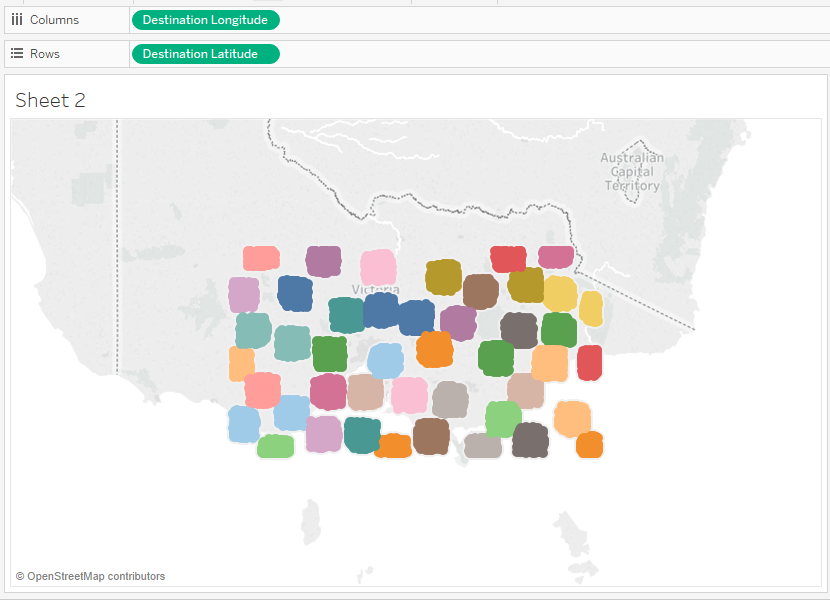

In [39]:
display(Image(filename='wrangling7.png', embed=True))

In [40]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 120 to 38763
Data columns (total 16 columns):
Id                       900 non-null object
Drone Type               900 non-null float64
Post Type                899 non-null float64
Package Weight           900 non-null float64
Origin Region            900 non-null float64
Destination Region       900 non-null float64
Origin Latitude          900 non-null float64
Origin Longitude         900 non-null float64
Destination Latitude     900 non-null float64
Destination Longitude    900 non-null float64
Journey Distance         900 non-null float64
Departure Date           900 non-null object
Departure Time           900 non-null object
Travel Time              900 non-null float64
Delivery Time            900 non-null object
Delivery Fare            900 non-null float64
dtypes: float64(12), object(4)
memory usage: 119.5+ KB


#### Post Type error

In [41]:
df_6 = df_7[['Id','Post Type']].copy()

In [42]:
id ={}
id1 = []
id5 = []
for index, row in df_6.iterrows():
    if row['Id'] is not None:
        if(re.search(r'ID1.*',row['Id'])):
            id1.append(row['Post Type'])
        elif(re.search(r'ID5.*',row['Id'])):
            id5.append(row['Post Type'])      

In [43]:
bp1 = pd.DataFrame(id1)

In [44]:
bp1.boxplot()

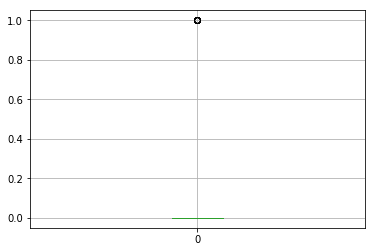

In [98]:
bp1.boxplot()

For ID's starting with 1 the most of the values are 0 and few of them are 1 which are the outliers.

Similarly will find the values for ID's starting with 5

In [45]:
bp2 = pd.DataFrame(id5)

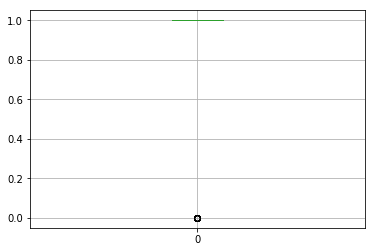

In [46]:
bp2.boxplot()

For ID's starting with 5 the most of the values are 1 and few of them are 0 which are the outliers.

#### To find the values for missing and the number of outliers to be fixed

In [47]:
id1_count0 = id1.count(0)
id5_count1 = id5.count(1)

print('Post type 0 for Id starting with 1')
print(id1.count(1))
print('Post type 0 for Id starting with 5')
print(id5.count(0))
print("Null values for Post type")
print(df_6['Post Type'].isnull().sum())

Post type 0 for Id starting with 1
9
Post type 0 for Id starting with 5
31
Null values for Post type
20


So there are 9 outliers for ID starting with 1, 31 for ID's starting with 5 and there are 20 missing values for Post Type

In [48]:
n = 0
df_0 = df_6.copy()
for index, row in df_0.iterrows():
    if not row['Id'] is None:
        if(re.search(r'ID1.*',row['Id'])):
            if(row['Post Type'] != 0.0):
                df_7['Post Type'][df_7['Id']==row['Id']]=0.0
                n = n+1
        elif(re.search(r'ID5.*',row['Id'])):
            if(row['Post Type'] != 1.0):
                df_7['Post Type'][df_7['Id']==row['Id']]=1.0
                n = n+1

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [49]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38764 entries, 0 to 38763
Data columns (total 16 columns):
Id                       38764 non-null object
Drone Type               38754 non-null float64
Post Type                38764 non-null float64
Package Weight           38764 non-null float64
Origin Region            38764 non-null float64
Destination Region       38764 non-null float64
Origin Latitude          38764 non-null float64
Origin Longitude         38764 non-null float64
Destination Latitude     38764 non-null float64
Destination Longitude    38764 non-null float64
Journey Distance         38764 non-null float64
Departure Date           38764 non-null object
Departure Time           38764 non-null object
Travel Time              38724 non-null float64
Delivery Time            38764 non-null object
Delivery Fare            38734 non-null float64
dtypes: float64(12), object(4)
memory usage: 5.0+ MB


In [50]:
id1 = []
id5 = []
for index, row in df_6.iterrows():
    if row['Id'] is not None:
        if(re.search(r'ID1.*',row['Id'])):
            id1.append(row['Post Type'])
        elif(re.search(r'ID5.*',row['Id'])):
            id5.append(row['Post Type'])      
id1_count0 = id1.count(0)
id5_count1 = id5.count(1)
print('Post type 0 for Id starting with 1')
print(id1.count(1))
print('Post type 0 for Id starting with 5')
print(id5.count(0))
print("Null values for Post type")
print(df_6['Post Type'].isnull().sum())

Post type 0 for Id starting with 1
9
Post type 0 for Id starting with 5
31
Null values for Post type
20


The outliers and the null values for Post Type are fixed

#### Departure Date

The common type of errors in Date type are format mismatch, invalid dates, hence will parse them using date utility to identify the dates with errors.

In [51]:
from dateutil.parser import parse

def is_date(string):
    try: 
        parse(string)
        return True
    except ValueError:
        return False

In [52]:
invalid_dates = []
for index, row in df_7.iterrows():
    if not is_date(row['Departure Date']):
        invalid_dates.append(row['Departure Date'])

In [53]:
len(invalid_dates)

210

Totally there are 210 invalid dates

In [54]:
n = 0
new_dates = []
df = df_7.copy()

for each in invalid_dates:    
    r = re.search(r'(2018)+[-]+([0-9]+)[-]+([0-9]+)',each)
    if(r):
        if(int(r.group(2)) > 12):
            if(int(r.group(3))==2):
                if(int(r.group(2))>28):
                    rev = '2018-'+'03'+'-'+'01'
                    new_dates.append(rev)
                    n = n+1
                else:
                    rev = '2018-'+r.group(3)+'-'+r.group(2)
                    new_dates.append(rev)
                    n = n+1
                
            elif(int(r.group(3))==4 | int(r.group(3))==6|int(r.group(3))==9|int(r.group(3))==11):
                if(int(r.group(2))>30):
                    rev = '2018-'+str(int(r.group(3))+1)+'-01'
                    n= n +1
                else:
                    rev = '2018-'+r.group(3)+'-'+r.group(2)
                    n = n+1
            else:
                if(int(r.group(2))>31):
                    rev = '2018-'+str(int(r.group(3))+1)+'-01'
                    n = n+1
                else:
                    rev = '2018-'+r.group(3)+'-'+r.group(2)
                    n = n+1
            df['Departure Date'][df['Departure Date']==each] = rev
        elif(r.group(2)=='02'):
            if(int(r.group(3)) > 28):
                rev = '2018-'+'03'+'-'+'01'
                n = n +1
            df['Departure Date'][df['Departure Date']==each] = rev
        elif(r.group(2)== '04' or r.group(2)== '06' or r.group(2)=='09' or r.group(2)=='11'):
            if(int(r.group(3))>30):
                rev = '2018-'+str(int(r.group(2))+1)+'-01'
                n= n +1
            df['Departure Date'][df['Departure Date']==each] = rev
        else:
            if(int(r.group(3))>31):
                rev = '2018-'+str(int(r.group(2))+1)+'-01'
            else:
                rev = '2018-'+r.group(2)+'-'+r.group(3)
            n = n + 1
            df['Departure Date'][df['Departure Date']==each] = rev

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We will parse the updated dates to verify if the error is fixed

In [55]:
invalid_ones = []
for index,row in df.iterrows():
    if not is_date(row['Departure Date']):
        invalid_ones.append(row['Departure Date'])

In [56]:
invalid_ones

[]

The Departure Date is fixed as there are no invalid dates

#### Drone Type/Travel Time

To calculate speed:

We know that the drone has take off speed and the landing speed. This speed varies for each of the three types of drones. Will formulate equation to find out the average speeds of each drone type.

Given take off and landing times are 5 minutes each.
Consider The distance covered while taking off as 'X'
The distance covered by drone while landing as 'Y'
The Journey distance as 'D'
The speed of drone during journey as 'Z'
The travel time as 'T'

Thus we can come up with the following equation:
5X + 5Y +(T-10)Z = D

To calculate the three variables X,Y,Z we need three equations and hence will consider 3 random samples of 3 each and calculate X,Y,Z

In [57]:
speed= {}
xy_value = {}
for each in df['Drone Type'].unique():
    if not(each is None):
        df_6 = df[df['Origin Region']==40]
        df_6 = df_6[df_6['Drone Type']==each]
        df_6 = df_6.head(9)
        distance1 = 0
        distance2 = 0
        distance3 = 0
        travel1 = 0
        travel2 = 0
        travel3 = 0
        i = 0
        for index, row in df_6.iterrows():
                if(i <3):
                    distance1 = distance1 + row['Journey Distance']
                    travel1 = travel1 + row['Travel Time']
                    i = i+1
                elif(i < 6 and i>=3):
                    distance2 = distance2 + row['Journey Distance']
                    travel2 = travel2 + row['Travel Time']
                    i = i+1
                elif(i>= 6):
                    distance3 = distance3 + row['Journey Distance']
                    travel3 = travel3 + row['Travel Time']
                    i = i+1
        distance1 = distance1/3
        distance2 = distance2/3
        distance3 = distance3/3
        travel1 = travel1/3
        travel2 = travel2/3
        travel3 = travel3/3
        x1 = 5/60
        x2 = x1
        x3 = x1
        y1 = x1
        y2 = x1
        y3 = x1
        z1 = (travel1-10)/60
        z2 = (travel2 - 10)/60
        z3 = (travel3 - 10)/60
        a = np.array([[x1,y1,z1], [x2,y2,z2],[x3,y3,z3]])
        b = np.array([distance1,distance2,distance3])
        x = np.linalg.lstsq(a, b)
        speed[each] = x[0][2]
        xy_value[each] = x[0][0]
    

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [58]:
speed

{1.0: 60.00098884809695,
 2.0: 64.99880252227469,
 3.0: 70.99939702878976,
 nan: 0.0}

The above are the speeds for the each drone types.
We will round it to nearest integer.
Thus will get speeds for each drone type as
<br>
Drone1 - 60Km/hr
<br>
Drone2 - 65 Km/hr
<br>
Drone3 - 71 Km/hr

In [59]:
xy_value

{1.0: 17.485999009455213,
 2.0: 19.03133311117137,
 3.0: 22.025262698244635,
 nan: 0.0}

The X and Y values for each drone types are
<br>
Drone type1 - 17.5
<br>
Drone type2 - 19
<br>
Drone type3 - 22

Will calculate how many errors are there in each drone type

In [60]:
df_t = df[df['Drone Type']==1]
n = 0
for index,row in df_t.iterrows():
    travel_time = 10+(row['Journey Distance']-(35/12))*60/60
    if(abs(row['Travel Time'] - travel_time) > 0.01):
        n = n+1
print("Errors in Drone type 1")        
print(n)
df_t = df[df['Drone Type']==2]
n = 0
for index,row in df_t.iterrows():
    travel_time = 10+(row['Journey Distance']-(38/12))*60/65
    if(abs(row['Travel Time'] - travel_time) > 0.01):
        n = n+1
print("Errors in Drone type 2")
print(n)
df_t = df[df['Drone Type']==3]
n = 0
for index,row in df_t.iterrows():
    travel_time = 10+(row['Journey Distance']-(44/12))*60/71
    if(abs(row['Travel Time'] - travel_time) > 0.01):
        n = n+1
print("Error in Drone type 3")
print(n)

Errors in Drone type 1
22
Errors in Drone type 2
27
Error in Drone type 3
0


Using the values of speed and x,y we will fix the travel time and Drone type

In [61]:
df_0 = df.copy()

In [62]:
n = 0
for index,row in df_0.iterrows():
    if(row['Travel Time']>0):
        if(row['Drone Type'] == 1):
            travel_time = 10+(row['Journey Distance']-(35/12))*60/60
            if(abs(row['Travel Time'] - travel_time) > 0.01):
                travel_time1 = 10+(row['Journey Distance']-(38/12))*60/65
                travel_time2 = 10+(row['Journey Distance']-(44/12))*60/71
                if(abs(row['Travel Time'] - travel_time1) <0.01):
                    df_0['Drone Type'][df_0['Id']==row['Id']] = 2
                    n = n+1
                elif(abs(row['Travel Time'] - travel_time2) <0.01):
                    df_0['Drone Type'][df_0['Id']==row['Id']] = 3
                    n = n+1
                else:
                    df_0['Travel Time'][df_0['Id']==row['Id']] = travel_time
                    n = n+1
            elif(row['Travel Time'] < 0):
                df_0['Travel Time'][df_0['Id']==row['Id']] = travel_time
                n = n+1

        elif(row['Drone Type'] == 2):
            travel_time = 10+(row['Journey Distance']-(38/12))*60/65
            if(abs(row['Travel Time'] - travel_time) > 0.01):
                travel_time1 = 10+(row['Journey Distance']-(35/12))*60/60
                travel_time2 = 10+(row['Journey Distance']-(44/12))*60/71
                if(abs(row['Travel Time'] - travel_time1) <0.01):
                    df_0['Drone Type'][df_0['Id']==row['Id']] = 1
                    n = n+1
                elif(abs(row['Travel Time'] - travel_time2) <0.01):
                    df_0['Drone Type'][df_0['Id']==row['Id']] = 3
                    n = n+1
                else:
                    df_0['Travel Time'][df_0['Id']==row['Id']] = travel_time
                    n = n+1
            elif(row['Travel Time'] < 0):
                df_0['Travel Time'][df_0['Id']==row['Id']] = travel_time
                n = n+1

        elif(row['Drone Type'] == 3):
            travel_time = 10+(row['Journey Distance']-(44/12))*60/71
            if(abs(row['Travel Time'] - travel_time) > 0.01):
                travel_time1 = 10+(row['Journey Distance']-(35/12))*60/60
                travel_time2 = 10+(row['Journey Distance']-(38/12))*60/65
                if(abs(row['Travel Time'] - travel_time1) <0.01):
                    df_0['Drone Type'][df_0['Id']==row['Id']] = 1
                    n = n+1
                elif(abs(row['Travel Time'] - travel_time2) <0.01):
                    df_0['Drone Type'][df_0['Id']==row['Id']] = 2
                    n = n+1
                else:
                    df_0['Travel Time'][df_0['Id']==row['Id']] = travel_time
                    n = n+1
            elif(row['Travel Time'] < 0):
                df_0['Travel Time'][df_0['Id']==row['Id']] = travel_time
                n = n+1
        else:
            travel_time = 10+(row['Journey Distance']-(35/12))*60/60
            travel_time1 = 10+(row['Journey Distance']-(38/12))*60/65
            travel_time2 = 10+(row['Journey Distance']-(44/12))*60/71
            if(abs(row['Travel Time'] - travel_time) < 0.01):
                df_0['Drone Type'][df_0['Id']==row['Id']] = 1
                n = n +1
            elif(abs(row['Travel Time'] - travel_time1) < 0.01):
                df_0['Drone Type'][df_0['Id']==row['Id']] = 2
                n = n +1
            elif(abs(row['Travel Time'] - travel_time2) < 0.01):
                df_0['Drone Type'][df_0['Id']==row['Id']] = 3
                n = n +1
    else:
        if(row['Drone Type'] == 1):
            travel_time = 10+(row['Journey Distance']-(35/12))*60/60
            df_0['Travel Time'][df_0['Id']==row['Id']] = travel_time
        elif(row['Drone Type'] == 2):
            travel_time = 10+(row['Journey Distance']-(38/12))*60/65
            df_0['Travel Time'][df_0['Id']==row['Id']] = travel_time
        elif(row['Drone Type'] == 3):
            travel_time = 10+(row['Journey Distance']-(44/12))*60/71
            df_0['Travel Time'][df_0['Id']==row['Id']] = travel_time

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyW

In [63]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38764 entries, 0 to 38763
Data columns (total 16 columns):
Id                       38764 non-null object
Drone Type               38764 non-null float64
Post Type                38764 non-null float64
Package Weight           38764 non-null float64
Origin Region            38764 non-null float64
Destination Region       38764 non-null float64
Origin Latitude          38764 non-null float64
Origin Longitude         38764 non-null float64
Destination Latitude     38764 non-null float64
Destination Longitude    38764 non-null float64
Journey Distance         38764 non-null float64
Departure Date           38764 non-null object
Departure Time           38764 non-null object
Travel Time              38764 non-null float64
Delivery Time            38764 non-null object
Delivery Fare            38734 non-null float64
dtypes: float64(12), object(4)
memory usage: 5.0+ MB


Both the travel time and the Drone type are fixed

Fixing Delivery and Departure Dates

There are few dates which are not synching with the travel time and hence needs to be fixed. The example of one such data is below

In [64]:
df_0[df_0['Id']=='ID1212062397']

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
529,ID1212062397,3.0,0.0,30.623,40.0,18.0,-38.235611,147.512349,-38.890522,144.105899,305.312,2018-02-12,16:38:32,264.91,19:08:08,196.77


In the above record the travel time is more than 4 hours but the difference between departure and delivery time is less than 3 hours

In [65]:
n = 0
df_fin = df_0.copy()
for index,row in df_fin.iterrows():
    r1 = re.search(r'([0-9]+)+[:]+([0-9]+)[:]+([0-9]+)',row['Departure Time'])
    r2 = re.search(r'([0-9]+)+[:]+([0-9]+)[:]+([0-9]+)',row['Delivery Time'])
    if(int(r1.group(1))>int(r2.group(1))):
        dep_hr = int(r1.group(1))*60*60
        dep_min = int(r1.group(2))*60
        dep_sec = int(r1.group(3))
        del_hr = (int(r2.group(1))+24)*60*60
        del_min = int(r2.group(2))*60
        del_sec = int(r2.group(3))
        dep_time1 = dep_hr + dep_min + dep_sec
        del_time1 = del_hr + del_min + del_sec
        travel_time1 = int(row['Travel Time']*60)
        diff = abs(dep_time1 - del_time1)
        if(abs(diff -travel_time1)>1):
            dep_hr = int(r2.group(1))*60*60
            dep_min = int(r2.group(2))*60
            dep_sec = int(r2.group(3))
            del_hr = (int(r1.group(1)))*60*60
            del_min = int(r1.group(2))*60
            del_sec = int(r1.group(3))
            dep_time = dep_hr + dep_min + dep_sec
            del_time = del_hr + del_min + del_sec
            travel_time = int(row['Travel Time']*60)
            diff = abs(dep_time - del_time)
            if(diff - travel_time < 1):
                df_fin['Departure Time'][df_fin['Id']==row['Id']] = row['Delivery Time']
                df_fin['Delivery Time'][df_fin['Id']==row['Id']] = row['Departure Time']
                n = n+1
            else:
                time = row['Travel Time']
                time_hr = int(time*60)
                del_hr = (time_hr + dep_time1)/60
                time_hour = int(del_hr/60)
                time_min = int(del_hr-time_hour*60)
                time_secs = int((del_hr-int(del_hr))*60)
                if(time_hour <10):
                    time_hour = '0'+str(time_hour)
                else:
                    str(time_hour)
                    
                if(time_min <10):
                    time_min = '0'+str(time_min)
                else:
                    str(time_min)
                    
                if(time_secs <10):
                    time_secs = '0'+str(time_secs)
                else:
                    str(time_secs)
                del_hr = str(time_hour)+':'+str(time_min)+':' +str(time_secs)
                df_fin['Delivery Time'][df_fin['Id']==row['Id']] = del_hr
            
    else:
        dep_hr = int(r1.group(1))*60*60
        dep_min = int(r1.group(2))*60
        dep_sec = int(r1.group(3))
        del_hr = (int(r2.group(1)))*60*60
        del_min = int(r2.group(2))*60
        del_sec = int(r2.group(3))
        dep_time = dep_hr + dep_min + dep_sec
        del_time = del_hr + del_min + del_sec
        travel_time = int(row['Travel Time']*60)
        diff = abs(dep_time - del_time)
        if(abs(diff -travel_time)>1):
            time = row['Travel Time']
            time_hr = int(time*60)
            del_hr = (time_hr + dep_time)/60
            time_hour = int(del_hr/60)
            time_min = int(del_hr-time_hour*60)
            time_secs = int((del_hr-int(del_hr))*60)
            if(time_hour <10):
                    time_hour = '0'+str(time_hour)
            else:
                str(time_hour)

            if(time_min <10):
                time_min = '0'+str(time_min)
            else:
                str(time_min)

            if(time_secs <10):
                time_secs = '0'+str(time_secs)
            else:
                str(time_secs)
            del_hr = str(time_hour)+':'+str(time_min)+':' +str(time_secs)
            df_fin['Delivery Time'][df_fin['Id']==row['Id']] = del_hr
            n = n+1

print('The number of values fixed')
print(n)

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

The number of values fixed
58


Outlier Detection and removal for the column Delivery Fare

In [66]:
df_na = df_fin.copy()

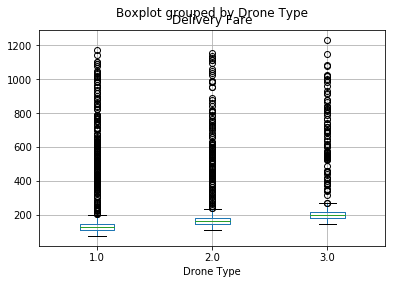

In [67]:
bp=df_na.boxplot(column = 'Delivery Fare',by='Drone Type')

In [68]:
df_drone_1 = df_na[df_na['Drone Type']==1].copy()
ddf1 = df_drone_1.copy()
q75,q25 = np.percentile(ddf1['Delivery Fare'].dropna(),[75,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
min_1 = min
max_1 = max

In [69]:
df_drone_2 = df_na[df_na['Drone Type']==2].copy()
ddf2= df_drone_2.copy()
q75,q25 = np.percentile(ddf2['Delivery Fare'].dropna(),[75,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
min_2 = min
max_2 = max

In [70]:
df_drone_3 = df_na[df_na['Drone Type']==3].copy()
ddf3 = df_drone_3.copy()
q75,q25 = np.percentile(ddf3['Delivery Fare'].dropna(),[75,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
min_3 = min
max_3 = max

Removing Outliers for each drone type

In [71]:
for each in df_na['Drone Type'].unique():
    for index,row in df_na.iterrows():
        if(row['Drone Type'] == 1):
            if(row['Delivery Fare'] > max_1 or row['Delivery Fare'] < min_1):
                df_na = df_na.drop(df.index[index])
        elif(row['Drone Type'] == 2 ):
            if(row['Delivery Fare'] > max_2 or row['Delivery Fare'] < min_2):
                df_na = df_na.drop(df.index[index])
        elif(row['Drone Type'] == 3):
            if(row['Delivery Fare'] > max_3 or row['Delivery Fare'] < min_3):
                df_na = df_na.drop(df.index[index])
            
                
    

In [72]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38367 entries, 0 to 38763
Data columns (total 16 columns):
Id                       38367 non-null object
Drone Type               38367 non-null float64
Post Type                38367 non-null float64
Package Weight           38367 non-null float64
Origin Region            38367 non-null float64
Destination Region       38367 non-null float64
Origin Latitude          38367 non-null float64
Origin Longitude         38367 non-null float64
Destination Latitude     38367 non-null float64
Destination Longitude    38367 non-null float64
Journey Distance         38367 non-null float64
Departure Date           38367 non-null object
Departure Time           38367 non-null object
Travel Time              38367 non-null float64
Delivery Time            38367 non-null object
Delivery Fare            38337 non-null float64
dtypes: float64(12), object(4)
memory usage: 5.0+ MB


The Outliers are removed and the delivery fare has 30 values to be imputed

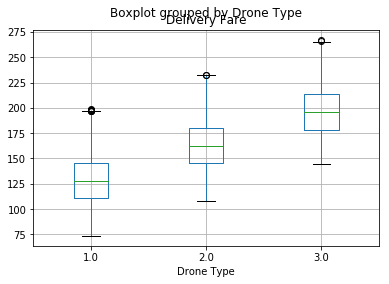

In [73]:
bp=df_na.boxplot(column = 'Delivery Fare',by='Drone Type')

In [74]:
category=[]
for index,row in df_na.iterrows():
    r1 = re.search(r'([0-9]+)+[:]+([0-9]+)[:]+([0-9]+)',row['Departure Time'])
    hour = int(r1.group(1))
    if(hour >= 6 and hour <= 11):
        category.append(1)
    elif(hour >=12 and hour<=20):
        category.append(2)
    else:
        category.append(3)

In [75]:
df_na['Category'] = category

In [76]:
df_fin_na = df_na.copy()

In [77]:
df_fin_ma = df_fin_na.drop(columns=['Id','Departure Time','Delivery Time', 'Departure Date'])

In [78]:
df_fin_ma.corr()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare,Category
Drone Type,1.000000,-0.009290,0.005191,-0.000317,0.001888,-0.002541,-0.010935,-0.004040,-0.003501,0.004477,-0.116654,0.732468,0.005373
Post Type,-0.009290,1.000000,0.004505,-0.001479,-0.007543,-0.000899,0.001847,0.000359,-0.006042,-0.001443,-0.000492,0.472041,-0.003962
Package Weight,0.005191,0.004505,1.000000,-0.001245,0.004529,0.003202,-0.000467,0.001758,0.000458,-0.007862,-0.008229,0.030312,0.001786
Origin Region,-0.000317,-0.001479,-0.001245,1.000000,-0.004556,0.063599,0.009947,0.010351,-0.007190,0.047125,0.046345,0.008858,-0.004454
Destination Region,0.001888,-0.007543,0.004529,-0.004556,1.000000,-0.005392,0.001170,0.064273,0.021278,0.044125,0.043809,0.010456,0.005487
Origin Latitude,-0.002541,-0.000899,0.003202,0.063599,-0.005392,1.000000,0.027984,0.000352,-0.003600,0.026723,0.026511,0.006225,0.006011
Origin Longitude,-0.010935,0.001847,-0.000467,0.009947,0.001170,0.027984,1.000000,-0.002044,-0.007191,-0.014816,-0.013085,-0.009412,0.004168
Destination Latitude,-0.004040,0.000359,0.001758,0.010351,0.064273,0.000352,-0.002044,1.000000,0.027393,0.031643,0.031549,0.002808,-0.005020
Destination Longitude,-0.003501,-0.006042,0.000458,-0.007190,0.021278,-0.003600,-0.007191,0.027393,1.000000,-0.009196,-0.009158,-0.005772,0.003884
Journey Distance,0.004477,-0.001443,-0.007862,0.047125,0.044125,0.026723,-0.014816,0.031643,-0.009196,1.000000,0.990610,0.247008,-0.007677


Delivery fare has strong correlation with Category, Drone type,Journey Distance, Post Type, Package Weight, Travel Time

Using linear regression method to Impute missing values for Delivery Fare

In [79]:
df_train = df_fin_ma.copy()

In [80]:
df_test = df_fin_ma.dropna(subset=['Delivery Fare'])

In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38337 entries, 0 to 38763
Data columns (total 13 columns):
Drone Type               38337 non-null float64
Post Type                38337 non-null float64
Package Weight           38337 non-null float64
Origin Region            38337 non-null float64
Destination Region       38337 non-null float64
Origin Latitude          38337 non-null float64
Origin Longitude         38337 non-null float64
Destination Latitude     38337 non-null float64
Destination Longitude    38337 non-null float64
Journey Distance         38337 non-null float64
Travel Time              38337 non-null float64
Delivery Fare            38337 non-null float64
Category                 38337 non-null int64
dtypes: float64(12), int64(1)
memory usage: 4.1 MB


In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38367 entries, 0 to 38763
Data columns (total 13 columns):
Drone Type               38367 non-null float64
Post Type                38367 non-null float64
Package Weight           38367 non-null float64
Origin Region            38367 non-null float64
Destination Region       38367 non-null float64
Origin Latitude          38367 non-null float64
Origin Longitude         38367 non-null float64
Destination Latitude     38367 non-null float64
Destination Longitude    38367 non-null float64
Journey Distance         38367 non-null float64
Travel Time              38367 non-null float64
Delivery Fare            38337 non-null float64
Category                 38367 non-null int64
dtypes: float64(12), int64(1)
memory usage: 4.1 MB


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
%matplotlib inline
lm_for_impute = LinearRegression() #instatiate

In [84]:
lm_fitting_df = df_test.copy()
lm_fitting_df

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare,Category
0,2.0,0.0,26.600,31.0,44.0,-37.877522,148.376599,-37.967863,142.972314,474.598,445.17,168.01,2
1,1.0,1.0,40.675,1.0,17.0,-37.136918,143.708653,-37.370240,146.218493,223.888,230.97,176.84,3
2,1.0,0.0,28.397,26.0,18.0,-38.546881,147.155501,-38.670277,144.190624,258.258,265.34,141.39,3
3,2.0,1.0,18.548,34.0,35.0,-38.970584,146.702559,-36.635389,147.866366,279.368,264.95,211.95,3
4,1.0,1.0,19.923,44.0,21.0,-37.796631,142.774401,-37.155002,145.040716,212.563,219.65,156.55,2
5,1.0,0.0,24.908,12.0,34.0,-38.176210,143.234852,-38.850189,146.730498,313.561,320.64,141.59,3
6,1.0,0.0,35.451,6.0,16.0,-38.879043,143.484383,-36.854073,144.843720,255.101,262.18,139.02,3
7,1.0,0.0,38.018,5.0,44.0,-37.974089,146.991011,-37.941319,143.021071,348.433,355.52,112.05,1
8,2.0,0.0,20.488,15.0,7.0,-38.149202,144.385917,-36.729780,146.176483,223.624,213.50,165.12,3
9,2.0,0.0,27.707,12.0,5.0,-38.359856,143.376238,-37.709173,147.011059,326.796,308.73,159.85,2


In [85]:
lm_for_impute.fit(lm_fitting_df[[x for x in lm_fitting_df.columns if x != 'Delivery Fare']],lm_fitting_df['Delivery Fare']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
df_train[df_train['Delivery Fare'].isnull()].head()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare,Category
222,1.0,1.0,6.580,24.0,15.0,-38.753226,148.121428,-38.297662,144.290652,337.416,344.50,NaN,2
2265,2.0,0.0,17.923,17.0,39.0,-37.463767,146.158298,-36.983534,146.593933,65.946,67.95,NaN,2
5840,1.0,1.0,12.284,13.0,26.0,-38.854719,147.406696,-38.567419,147.069571,43.363,50.45,NaN,2
6340,1.0,0.0,8.591,36.0,22.0,-38.199870,145.626185,-38.740789,142.883106,246.524,253.61,NaN,2
6364,1.0,0.0,11.721,8.0,25.0,-37.188931,148.339460,-37.738900,144.385031,354.693,361.78,NaN,3


In [87]:
lm_for_impute.predict(df_train.drop(['Delivery Fare'],axis=1))

array([170.24606627, 174.76676362, 138.025852  , ..., 198.2651731 ,
       139.4914046 , 160.98661678])

In [88]:
df_train['Delivery Fare'][df_train['Delivery Fare'].isnull()] = lm_for_impute.predict(df_train.drop(['Delivery Fare'],axis=1))

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1:],random_state=111)

C:\Users\HP WORLD\Anaconda4\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:
map(pd.np.shape,[X_train, X_test, y_train, y_test])

In [91]:
lm_full = LinearRegression()

In [92]:
lm_full.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
print ('r-squared for this model = ',lm_full.score(X_test,y_test))

r-squared for this model =  0.9366711855649108


R square values gives how close the data is to the fitted linear model.

In [94]:
df_na = df_na.drop(columns=['Delivery Fare','Category'])

In [95]:
df_na['Delivery Fare']= df_train['Delivery Fare']

In [96]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38367 entries, 0 to 38763
Data columns (total 16 columns):
Id                       38367 non-null object
Drone Type               38367 non-null float64
Post Type                38367 non-null float64
Package Weight           38367 non-null float64
Origin Region            38367 non-null float64
Destination Region       38367 non-null float64
Origin Latitude          38367 non-null float64
Origin Longitude         38367 non-null float64
Destination Latitude     38367 non-null float64
Destination Longitude    38367 non-null float64
Journey Distance         38367 non-null float64
Departure Date           38367 non-null object
Departure Time           38367 non-null object
Travel Time              38367 non-null float64
Delivery Time            38367 non-null object
Delivery Fare            38367 non-null float64
dtypes: float64(12), object(4)
memory usage: 5.0+ MB


In [97]:
df_na.to_csv("29470811_solution.csv",index=False)